In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("updatedprob_test25mar.csv")

# Print the first few rows
print(df.head())  # Shows the first 5 rows

                                          image_path  label  ViT_Prob_Real  \
0  /Users/mandylee/Documents/AI/GenAIProject/Arti...      1       0.000521   
1  /Users/mandylee/Documents/AI/GenAIProject/Arti...      0       0.983882   
2  /Users/mandylee/Documents/AI/GenAIProject/Arti...      1       0.318847   
3  /Users/mandylee/Documents/AI/GenAIProject/Arti...      0       0.993034   
4  /Users/mandylee/Documents/AI/GenAIProject/Arti...      1       0.004214   

   ViT_Prob_Fake  MobileNet_Prob_Real  MobileNet_Prob_Fake  
0       0.999479             0.118592             0.881408  
1       0.016118             0.909902             0.090098  
2       0.681153             0.159168             0.840832  
3       0.006966             0.797855             0.202145  
4       0.995786             0.096673             0.903327  


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("updatedprob_test25mar.csv")

# Features: Both real and fake probabilities from ViT & MobileNet
X = df[["ViT_Prob_Real", "ViT_Prob_Fake", "MobileNet_Prob_Real", "MobileNet_Prob_Fake"]]
y = df["label"]  # True labels (0 = fake, 1 = real)

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (Meta-classifier)
meta_classifier = LogisticRegression()
meta_classifier.fit(X_train, y_train)

# Get predictions (final 0 or 1 output)
y_pred_meta = meta_classifier.predict(X_test)

# Evaluate the meta-classifier
print("\n Meta-Classifier (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test, y_pred_meta))
print(classification_report(y_test, y_pred_meta))

# Print feature weights (which model is more important?)
print("\n Feature Importance (Weights):")
for feature, weight in zip(X.columns, meta_classifier.coef_[0]):
    print(f"{feature} Weight: {weight}")



 Meta-Classifier (Logistic Regression):
Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       197
           1       0.98      0.96      0.97       203

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


 Feature Importance (Weights):
ViT_Prob_Real Weight: -1.9836810751206964
ViT_Prob_Fake Weight: 2.242649885450762
MobileNet_Prob_Real Weight: -2.5720879033938404
MobileNet_Prob_Fake Weight: 2.831056540373984


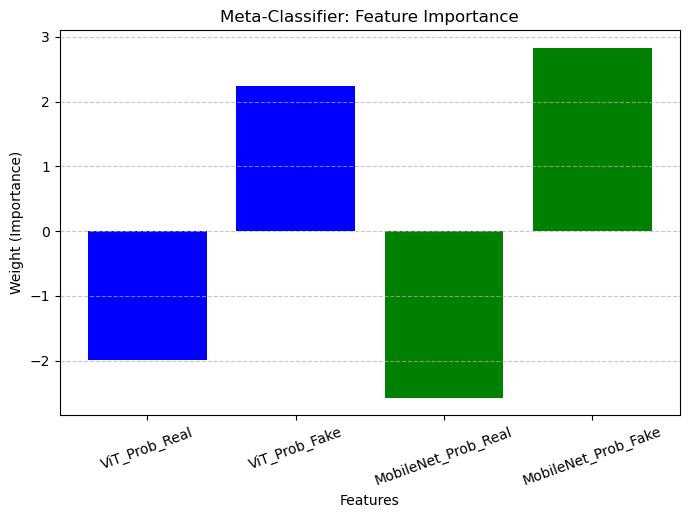

In [6]:
import matplotlib.pyplot as plt

# Feature names
feature_names = ["ViT_Prob_Real", "ViT_Prob_Fake", "MobileNet_Prob_Real", "MobileNet_Prob_Fake"]

# Extract weights from the trained logistic regression model
weights = meta_classifier.coef_[0]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(feature_names, weights, color=["blue", "blue", "green", "green"])
plt.xlabel("Features")
plt.ylabel("Weight (Importance)")
plt.title("Meta-Classifier: Feature Importance")
plt.xticks(rotation=20)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [7]:
import joblib

# Save the trained model
joblib.dump(meta_classifier, "meta_classifierprob.pkl")
print("Meta-classifier saved successfully!")


Meta-classifier saved successfully!


In [1]:
# Load the trained Logistic Regression meta-classifier
# Load the saved model
meta_classifier = joblib.load("meta_classifierprob.pkl")
print("Meta-classifier loaded successfully!")

import pandas as pd

# Example new input data (ViT & MobileNet predictions)
new_data = pd.DataFrame({
    "ViT_Prob_Real": [0.85],   # Example ViT probability of real
    "ViT_Prob_Fake": [0.15],   # Example ViT probability of fake
    "MobileNet_Prob_Real": [0.92],  # Example MobileNet probability of real
    "MobileNet_Prob_Fake": [0.08]   # Example MobileNet probability of fake
})

# Predict using the loaded meta-classifier
final_prediction = meta_classifier.predict(new_data)

print("Final Prediction (0 = Fake, 1 = Real):", final_prediction[0])


NameError: name 'joblib' is not defined